In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_path = 'C:/Users/user/OneDrive - Universidad Complutense de Madrid (UCM)/Escritorio/A_Doctorado/23/00_DOCENCIA/Máster Tit_Propio/Árboles/arboles.csv'  # Reemplaza con la ruta correcta de tu archivo

df = pd.read_csv(file_path)
print(df.head())
print(f'\nLa frecuencia de cada clase es: \n{df.chd.value_counts()}')

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1

La frecuencia de cada clase es: 
0    302
1    160
Name: chd, dtype: int64


In [3]:
# Se observa si se tiene algún valor perdido.
df.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [4]:
# Categorizar la variable de respuesta
df['chd'] = df['chd'].apply(lambda x: 'Yes' if x == 1 else 'No')
print(df.head())

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Yes
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Yes
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46   No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Yes
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Yes


In [5]:
# Separar las variables predictoras y la variable de respuesta.
X = df[['tobacco']]
y = df['chd']
# min_sample_split: el número mínimo de casos que contiene una hoja para que pueda ser creada.
# criterion: Criterio de división: “gini”, “entropy”, “log_loss”.
# max_depth = Profundidad máxima del árbol. En caso de no especificar, el clasificador sigue segmentando hasta que
# las hojas son puras, o se alcanza el min_sample_split. Con caracter ilustrativo, se selecciona bajo.
arbol1 = DecisionTreeClassifier(min_samples_split=30, criterion='gini', max_depth = 2)
# Crear un conjunto de entrenamiento y uno de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Construir el modelo de árbol de decisiones
arbol1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=30)

In [6]:
# ES IMPORTANTE QUE LA DISTRIBUCIÓN DE LAS CLASES SEA 'SIMILAR' EN TRAIN Y TEST.
print(f'La frecuencia de cada clase en train es: \n{y_train.value_counts(normalize=True)}')
print(f'\nLa frecuencia de cada clase en test es: \n{y_test.value_counts(normalize=True)}')

La frecuencia de cada clase en train es: 
No     0.658537
Yes    0.341463
Name: chd, dtype: float64

La frecuencia de cada clase en test es: 
No     0.634409
Yes    0.365591
Name: chd, dtype: float64


In [7]:
# Conocer los niveles de la variable a predecir
print(arbol1.classes_)
# Conocer el nombre de las variables predictoras
print(arbol1.feature_names_in_)
# Obtener información detallada de cada nodo y las reglas de decisión
tree_rules = export_text(arbol1, feature_names=list(X.columns),show_weights=True)
print(tree_rules)

['No' 'Yes']
['tobacco']
|--- tobacco <= 0.48
|   |--- tobacco <= 0.41
|   |   |--- weights: [96.00, 18.00] class: No
|   |--- tobacco >  0.41
|   |   |--- weights: [4.00, 0.00] class: No
|--- tobacco >  0.48
|   |--- tobacco <= 8.04
|   |   |--- weights: [127.00, 78.00] class: No
|   |--- tobacco >  8.04
|   |   |--- weights: [16.00, 30.00] class: Yes



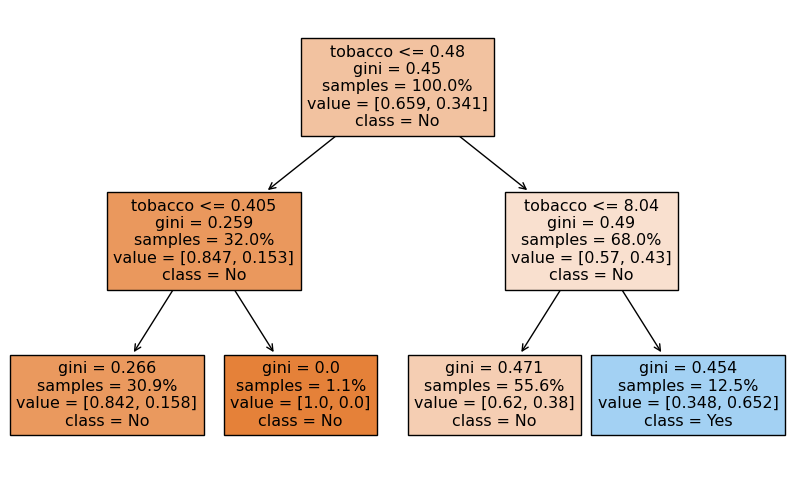

In [8]:

plt.figure(figsize=(10, 6))
plot_tree(arbol1, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True,
         proportion = True)
plt.show()

In [9]:
# Se vuelve a entrenar el árbol con más variables. No necesariamente tiene que utilizar todas, por lo que es importante
# conocer la importancia predictiva de cada variable en el modelo.

#es importante tratar de forma adecuada las variables categóricas. Se convierten en numéricas con la regla: one hot encoding.
df[['famhist']] = pd.get_dummies(df[['famhist']],drop_first=True)
# Separar las variables predictoras y la variable de respuesta.
X = df.drop('chd', axis=1)
y = df['chd']
#Se selecciona profundidad 4 sólo con caracter ilustrativo, al simplificar el árbol.
arbol2 = DecisionTreeClassifier(min_samples_split=30, criterion='gini', max_depth = 4)
# Crear un conjunto de entrenamiento y uno de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Construir el modelo de árbol de decisiones
arbol2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=30)

In [10]:
# Se estudia la importancia - o valor predictivo - de cada variable en el modelo.
print(pd.DataFrame({'nombre': arbol2.feature_names_in_, 'importancia': arbol2.feature_importances_}))

      nombre  importancia
0        sbp     0.049070
1    tobacco     0.000000
2        ldl     0.179858
3  adiposity     0.000000
4    famhist     0.056089
5      typea     0.094607
6    obesity     0.105539
7    alcohol     0.000000
8        age     0.514837


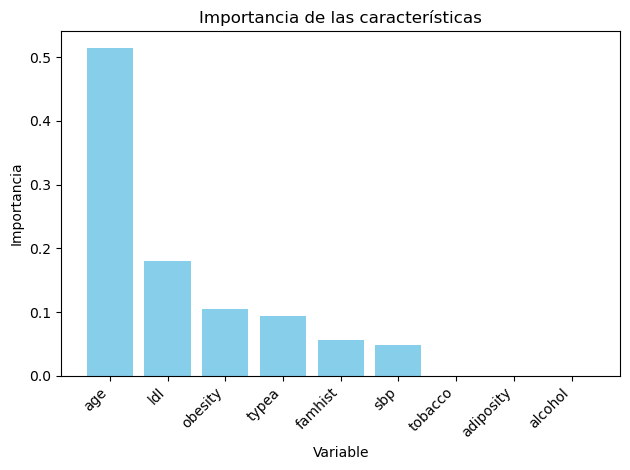

In [11]:
# Ordenar el DataFrame por importancia en orden descendente
df_importancia = pd.DataFrame({'Variable': arbol2.feature_names_in_, 'Importancia': arbol2.feature_importances_}).sort_values(by='Importancia', ascending=False)

# Crear un gráfico de barras
plt.bar(df_importancia['Variable'], df_importancia['Importancia'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres en el eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

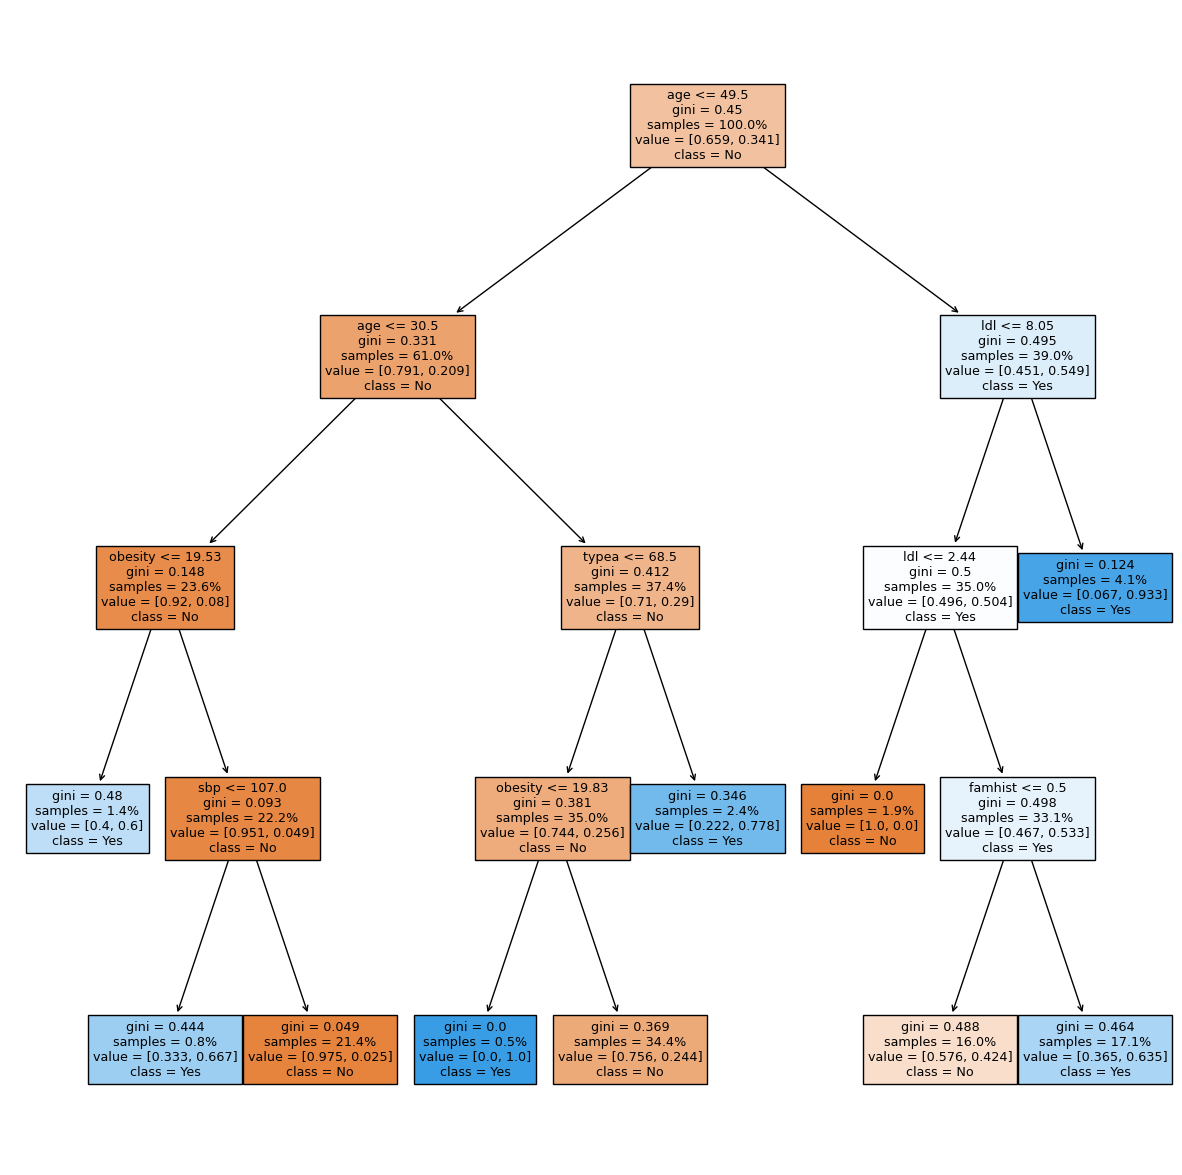

In [12]:
plt.figure(figsize=(15, 15))
plot_tree(arbol2, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True,
         proportion = True)
plt.show()

In [13]:
file_path = 'C:/Users/user/OneDrive - Universidad Complutense de Madrid (UCM)/Escritorio/A_Doctorado/23/00_DOCENCIA/Máster Tit_Propio/Árboles/compress.csv'  # Reemplaza con la ruta correcta de tu archivo

compress = pd.read_csv(file_path)
compress.head()

,cstrength,cement,blast,ash,water,plasti,aggreg,fineagg,age
0,79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,61.89,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,40.27,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,41.05,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,44.30,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [14]:
compress.isna().sum()

cstrength    0
cement       0
blast        0
ash          0
water        0
plasti       0
aggreg       0
fineagg      0
age          0
dtype: int64

In [15]:
# Separar las variables predictoras y la variable de respuesta.
X_c = compress.drop('cstrength', axis=1)
y_c = compress['cstrength']
# criterion: Criterio de división: “squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”.
# Se selecciona squared error con motivos ilustrativos. Es equivalente a la reducción de varianza.
# A priori, con motivos ilustrativos, se mantiene min_sample_split y max_depth en estos valores para facilitar la visualización del árbol.
# Recordar que estos son parámetros a modificar para encontrar el modelo óptimo.
# cpp_alpha es el parámetro de complejidad, el cual establece “penalizaciones” si se producen muchas divisiones. Cuanto más alto
# más pequeño será el árbol.
arbol3 = DecisionTreeRegressor(min_samples_split=30, criterion='squared_error', max_depth = 4, ccp_alpha = 0.01)
# Crear un conjunto de entrenamiento y uno de prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
# Construir el modelo de árbol de decisiones
arbol3.fit(X_train_c, y_train_c)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4, min_samples_split=30)

In [16]:
print(pd.DataFrame({'nombre': arbol3.feature_names_in_, 'importancia': arbol3.feature_importances_}))

    nombre  importancia
0   cement     0.430857
1    blast     0.034447
2      ash     0.020320
3    water     0.141266
4   plasti     0.004367
5   aggreg     0.000000
6  fineagg     0.000000
7      age     0.368743


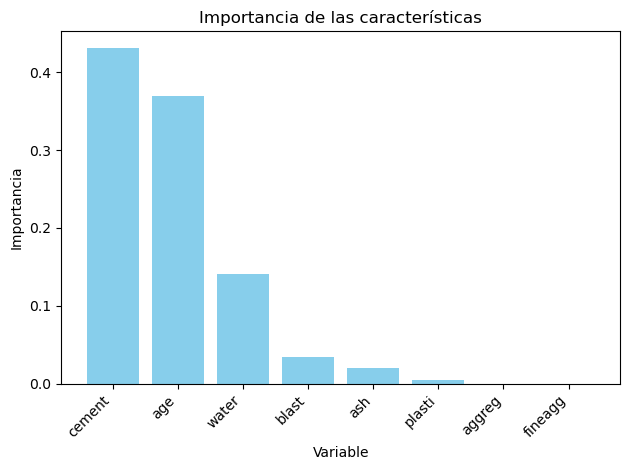

In [17]:
# Ordenar el DataFrame por importancia en orden descendente
df_importancia_c = pd.DataFrame({'Variable': arbol3.feature_names_in_, 'Importancia': arbol3.feature_importances_}).sort_values(by='Importancia', ascending=False)

# Crear un gráfico de barras
plt.bar(df_importancia_c['Variable'], df_importancia_c['Importancia'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres en el eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

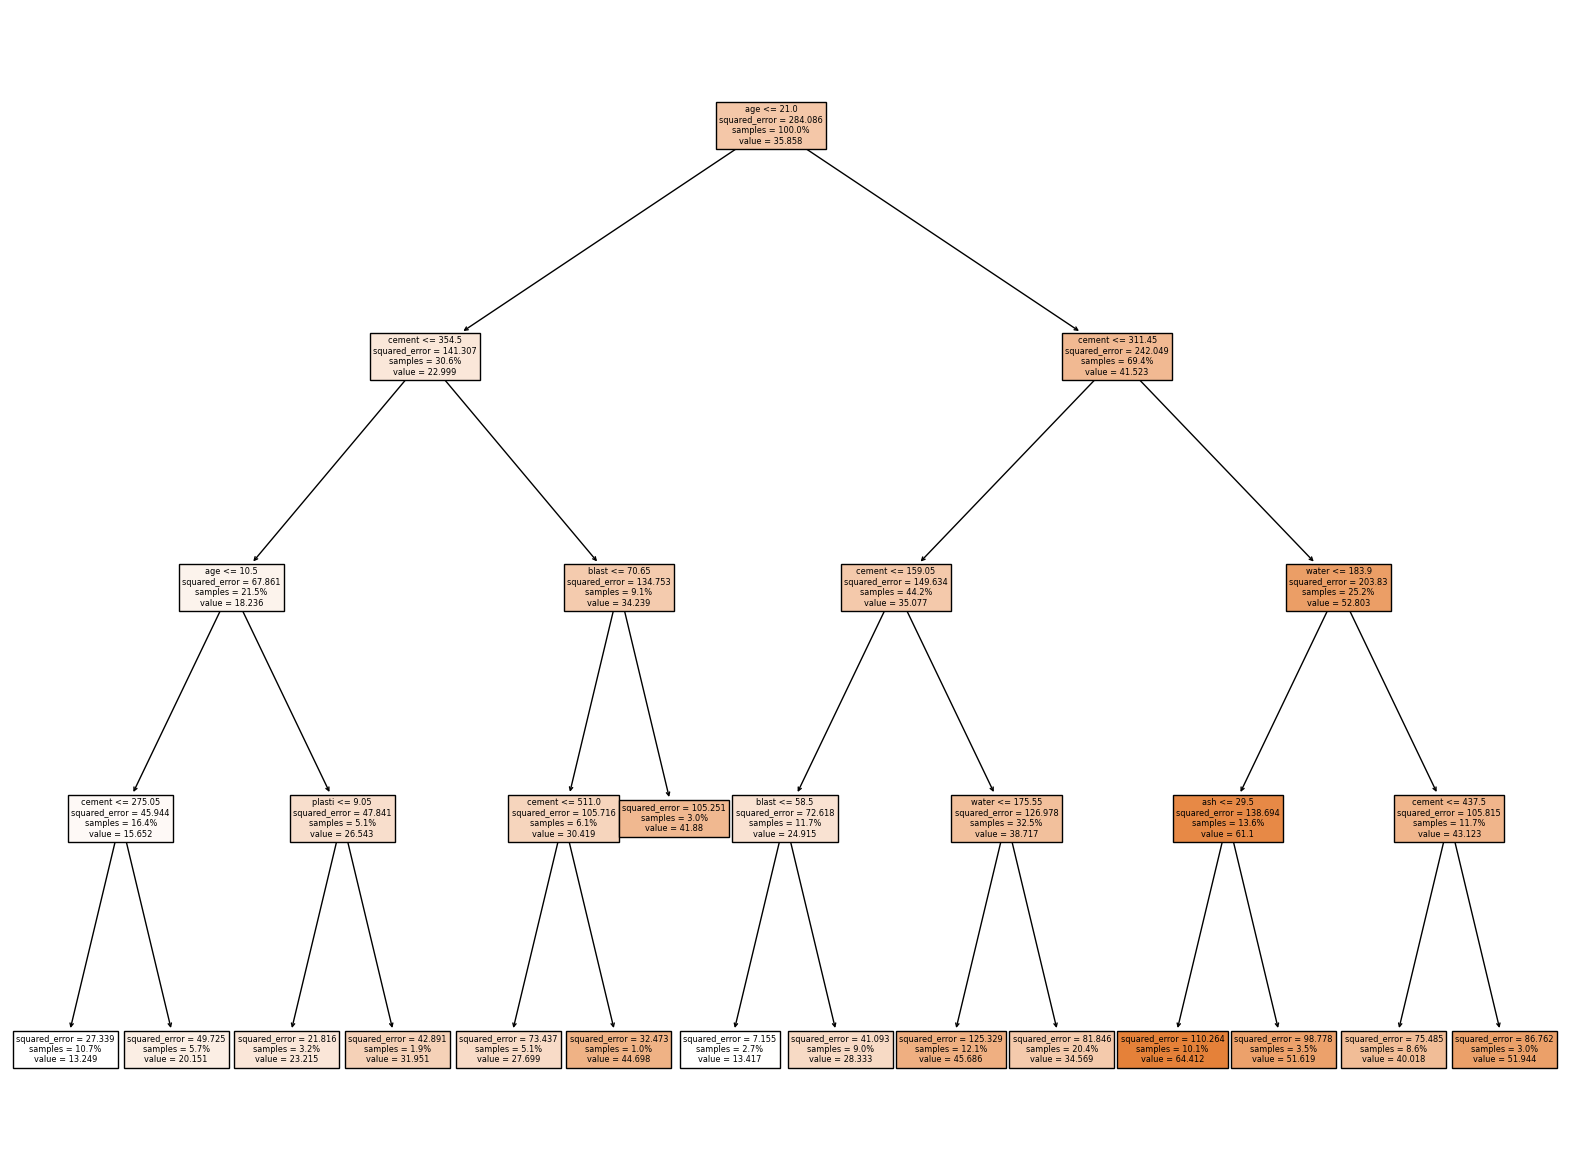

In [18]:
plt.figure(figsize=(20, 15))
plot_tree(arbol3, feature_names=X_c.columns.tolist(), filled=True,
         proportion = True)
plt.show()

In [19]:
## tuneo y evaluación predictiva del modelo para variable dependiente categórica.

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
#recordar que arbol2 es el árbol cuyas VI son todas las variables.
# cv = crossvalidation
grid_search = GridSearchCV(estimator=arbol2, 
                           param_grid=params, 
                           cv=4, scoring = scoring_metrics, refit='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=4,
                                              min_samples_split=30),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [20]:
# Obtener resultados del grid search
results = pd.DataFrame(grid_search.cv_results_)

# Mostrar resultados
print("Resultados de Grid Search:")
print(results[['params', 'mean_test_accuracy', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']])

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print(grid_search.best_estimator_)

Resultados de Grid Search:
                                               params  mean_test_accuracy  \
0   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.650421   
1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.650421   
2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.650421   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.650421   
4   {'criterion': 'gini', 'max_depth': 2, 'min_sam...            0.653109   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.631399   
6   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.628711   
7   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.623276   
8   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.625964   
9   {'criterion': 'gini', 'max_depth': 3, 'min_sam...            0.634146   
10  {'criterion': 'gini', 'max_depth': 5, 'min_sam...            0.636805   
11  {'criterion': 'gini', 'max_depth': 5, 'min_sa

In [21]:
print(results.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_accuracy', 'split1_test_accuracy',
       'split2_test_accuracy', 'split3_test_accuracy', 'mean_test_accuracy',
       'std_test_accuracy', 'rank_test_accuracy',
       'split0_test_precision_macro', 'split1_test_precision_macro',
       'split2_test_precision_macro', 'split3_test_precision_macro',
       'mean_test_precision_macro', 'std_test_precision_macro',
       'rank_test_precision_macro', 'split0_test_recall_macro',
       'split1_test_recall_macro', 'split2_test_recall_macro',
       'split3_test_recall_macro', 'mean_test_recall_macro',
       'std_test_recall_macro', 'rank_test_recall_macro',
       'split0_test_f1_macro', 'split1_test_f1_macro', 'split2_test_f1_macro',
       'split3_test_f1_macro', 'mean_test_f1_macro', 'std_test_f1_macro',
       'rank_test_f1_macro'],
      dtype='object')


In [22]:
# Para seleccionar una parametrización específica y la mejor de acuerdo con el criterio
# de GridSearch, acceder a esta y conocer su combinación.
results.iloc[8].params

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 50}

In [23]:
# se selecciona el modelo candidato, y se procede a analizar su robustez a lo largo de cross validation.
res_1 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[2]
res_2 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[4]
res_3 = results[['split0_test_accuracy', 'split1_test_accuracy','split2_test_accuracy', 'split3_test_accuracy']].iloc[18]

In [24]:
res_1.values

array([0.64516129, 0.63043478, 0.66304348, 0.66304348])

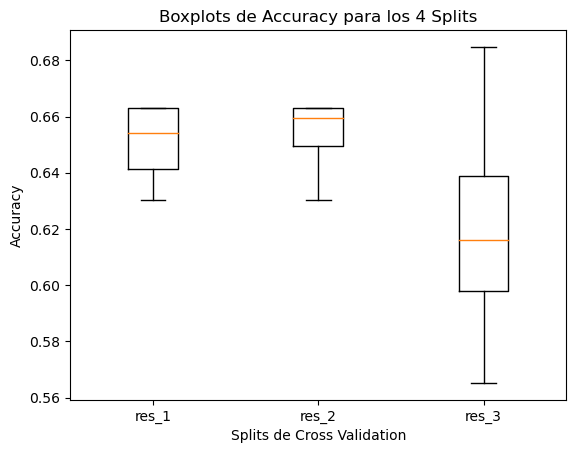

In [25]:
# Crear un boxplot para los cuatro valores de accuracy
plt.boxplot([res_1.values,res_2.values,res_3.values], labels = ['res_1','res_2','res_3'])
plt.title('Boxplots de Accuracy para los 4 Splits')
plt.xlabel('Splits de Cross Validation')
plt.ylabel('Accuracy')
plt.show()
# Nótese en la solución que boxplots con gran amplitud no son deseables, ya que se caracterizan por poca robustez de la solución

In [26]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Ajustar el mejor modelo con todo el conjunto de entrenamiento
best_model.fit(X_train, y_train)

# Predicciones en conjunto de entrenamiento y prueba
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [27]:
#medidas de bondad de ajuste en train

conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Matriz de Confusión:")
print(conf_matrix)
print("\nMedidas de Desempeño:")
print(classification_report(y_train, y_train_pred))

Matriz de Confusión:
[[181  62]
 [ 40  86]]

Medidas de Desempeño:
              precision    recall  f1-score   support

          No       0.82      0.74      0.78       243
         Yes       0.58      0.68      0.63       126

    accuracy                           0.72       369
   macro avg       0.70      0.71      0.70       369
weighted avg       0.74      0.72      0.73       369



In [241]:
y_train_auc = pd.get_dummies(y_train,drop_first=True)
# Calcular el área bajo la curva ROC (AUC)
y_prob_train = best_model.predict_proba(X_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_auc, y_prob_train)
roc_auc = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC): {roc_auc:.2f}")


Área bajo la curva ROC (AUC): 0.76


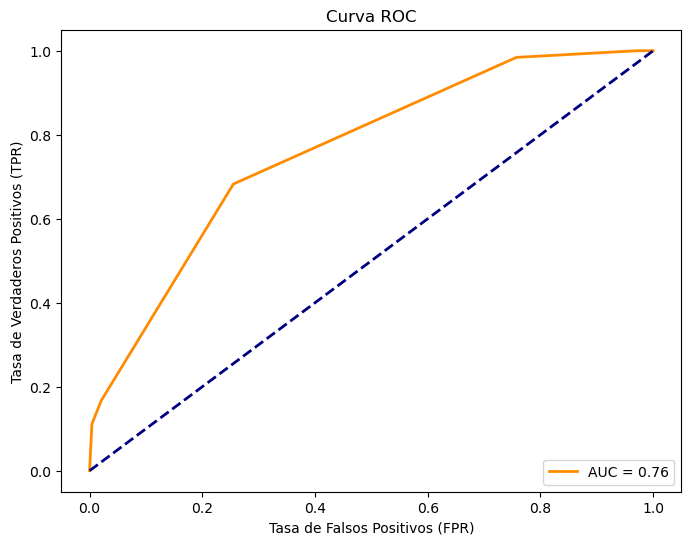

In [242]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [243]:
# medidas de bondad de ajuste en test

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión:")
print(conf_matrix)
print("\nMedidas de Desempeño:")
print(classification_report(y_test, y_test_pred))

Matriz de Confusión:
[[45 14]
 [13 21]]

Medidas de Desempeño:
              precision    recall  f1-score   support

          No       0.78      0.76      0.77        59
         Yes       0.60      0.62      0.61        34

    accuracy                           0.71        93
   macro avg       0.69      0.69      0.69        93
weighted avg       0.71      0.71      0.71        93



In [244]:
y_test_auc = pd.get_dummies(y_test,drop_first=True)
# Calcular el área bajo la curva ROC (AUC)
y_prob_test = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_auc, y_prob_test)
roc_auc_test = auc(fpr, tpr)
print(f"\nÁrea bajo la curva ROC (AUC): {roc_auc:.2f}")


Área bajo la curva ROC (AUC): 0.76


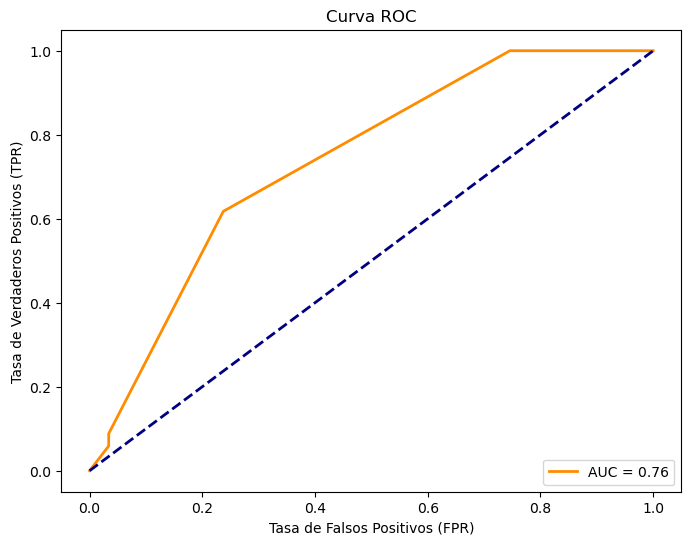

In [245]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

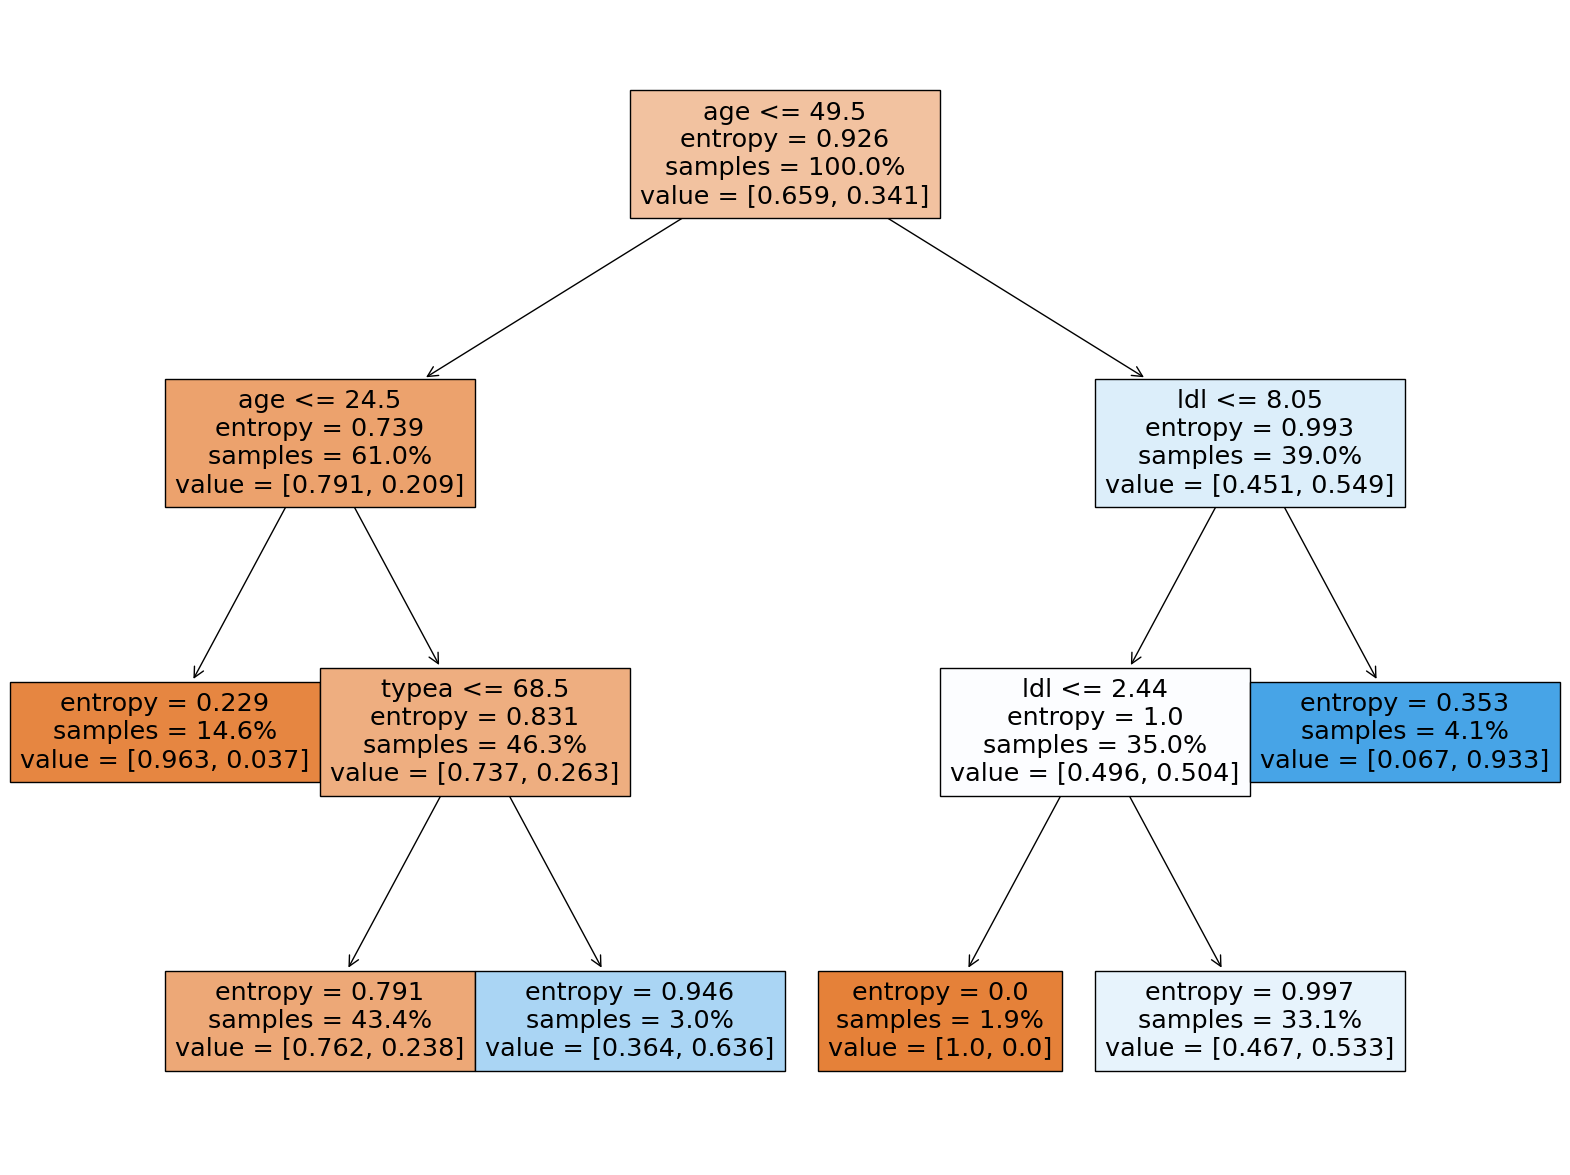

In [246]:
plt.figure(figsize=(20, 15))
plot_tree(best_model, feature_names=X.columns.tolist(), filled=True,
         proportion = True)
plt.show()

In [247]:
## tuneo y evaluación predictiva del modelo para variable dependiente numérica.

params_c = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [5, 10, 20, 50, 100],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
# Definir las métricas de evaluación que deseas utilizar
scoring_metrics_c = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
}
# cv = crossvalidation
grid_search_c = GridSearchCV(estimator=arbol3, 
                           param_grid=params_c, 
                           cv=4, scoring = scoring_metrics_c, refit='MSE')
grid_search_c.fit(X_train_c, y_train_c)

GridSearchCV(cv=4,
             estimator=DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4,
                                             min_samples_split=30),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             refit='MSE',
             scoring={'MAE': make_scorer(mean_absolute_error),
                      'MSE': make_scorer(mean_squared_error),
                      'RMSE': make_scorer(<lambda>)})

In [248]:
# Obtener resultados del grid search
results_c = pd.DataFrame(grid_search_c.cv_results_)

# Mostrar resultados
print("Resultados de Grid Search:")
print(results_c)

# Obtener el mejor modelo
best_model_c = grid_search_c.best_estimator_
print(grid_search_c.best_estimator_)

Resultados de Grid Search:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.001539      0.001209         0.000600        0.000608   
1        0.000054      0.000093         0.002380        0.004122   
2        0.000000      0.000000         0.000000        0.000000   
3        0.000743      0.000825         0.000667        0.000681   
4        0.003456      0.004899         0.000527        0.000528   
..            ...           ...              ...             ...   
95       0.005227      0.000412         0.001237        0.000429   
96       0.004434      0.000386         0.001061        0.000107   
97       0.003518      0.000514         0.001250        0.000433   
98       0.003083      0.000148         0.001003        0.000006   
99       0.000500      0.000866         0.000426        0.000738   

   param_criterion param_max_depth param_min_samples_split  \
0    squared_error               2                       5   
1    squared_error              

In [249]:
# Ajustar el mejor modelo con todo el conjunto de entrenamiento
best_model_c.fit(X_train_c, y_train_c)

# Predicciones en conjunto de entrenamiento y prueba
y_train_pred_c = best_model_c.predict(X_train_c)
y_test_pred_c = best_model_c.predict(X_test_c)

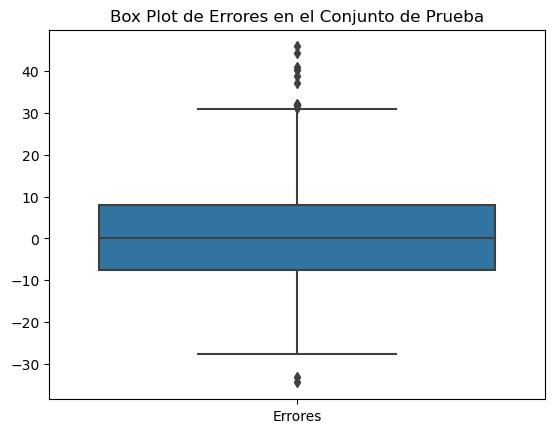

In [250]:
# Medidas de bondad de ajuste en train
y_pred_train_c = best_model_c.predict(X_train_c)
# Suponiendo que tienes los valores reales en y_test_c y las predicciones en y_pred_test_c
errores = y_train_c - y_pred_train_c

# Convertir los errores a un DataFrame
errores_df = pd.DataFrame({'Errores': errores})
# Box Plot de los errores en el conjunto de prueba
sns.boxplot(errores_df)
plt.title('Box Plot de Errores en el Conjunto de Prueba')
plt.show()


In [251]:
# Calcular diferentes medidas de bondad de ajuste
mae = mean_absolute_error(y_train_c, y_pred_train_c)
mse = mean_squared_error(y_train_c, y_pred_train_c)
rmse = np.sqrt(mse)
r2 = r2_score(y_train_c, y_pred_train_c)

# Imprimir las métricas
print(f'MAE (Error Absoluto Medio): {mae:.2f}')
print(f'MSE (Error Cuadrático Medio): {mse:.2f}')
print(f'RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE (Error Absoluto Medio): 9.46
MSE (Error Cuadrático Medio): 146.00
RMSE (Raíz del Error Cuadrático Medio): 12.08
R²: 0.49


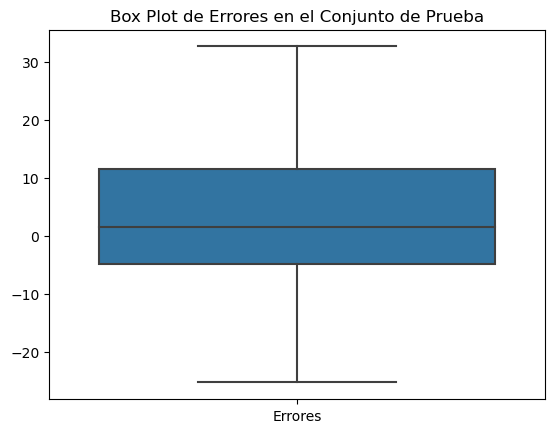

In [252]:
# Medidas de bondad de ajuste en test:

# Medidas de bondad de ajuste en train
y_pred_test_c = best_model_c.predict(X_test_c)
# Suponiendo que tienes los valores reales en y_test_c y las predicciones en y_pred_test_c
errores = y_test_c - y_pred_test_c

# Convertir los errores a un DataFrame
errores_df = pd.DataFrame({'Errores': errores})
# Box Plot de los errores en el conjunto de prueba
sns.boxplot(errores_df)
plt.title('Box Plot de Errores en el Conjunto de Prueba')
plt.show()

In [253]:
mae = mean_absolute_error(y_test_c, y_pred_test_c)
mse = mean_squared_error(y_test_c, y_pred_test_c)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_c, y_pred_test_c)

# Imprimir las métricas
print(f'MAE (Error Absoluto Medio): {mae:.2f}')
print(f'MSE (Error Cuadrático Medio): {mse:.2f}')
print(f'RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE (Error Absoluto Medio): 9.49
MSE (Error Cuadrático Medio): 141.96
RMSE (Raíz del Error Cuadrático Medio): 11.91
R²: 0.45


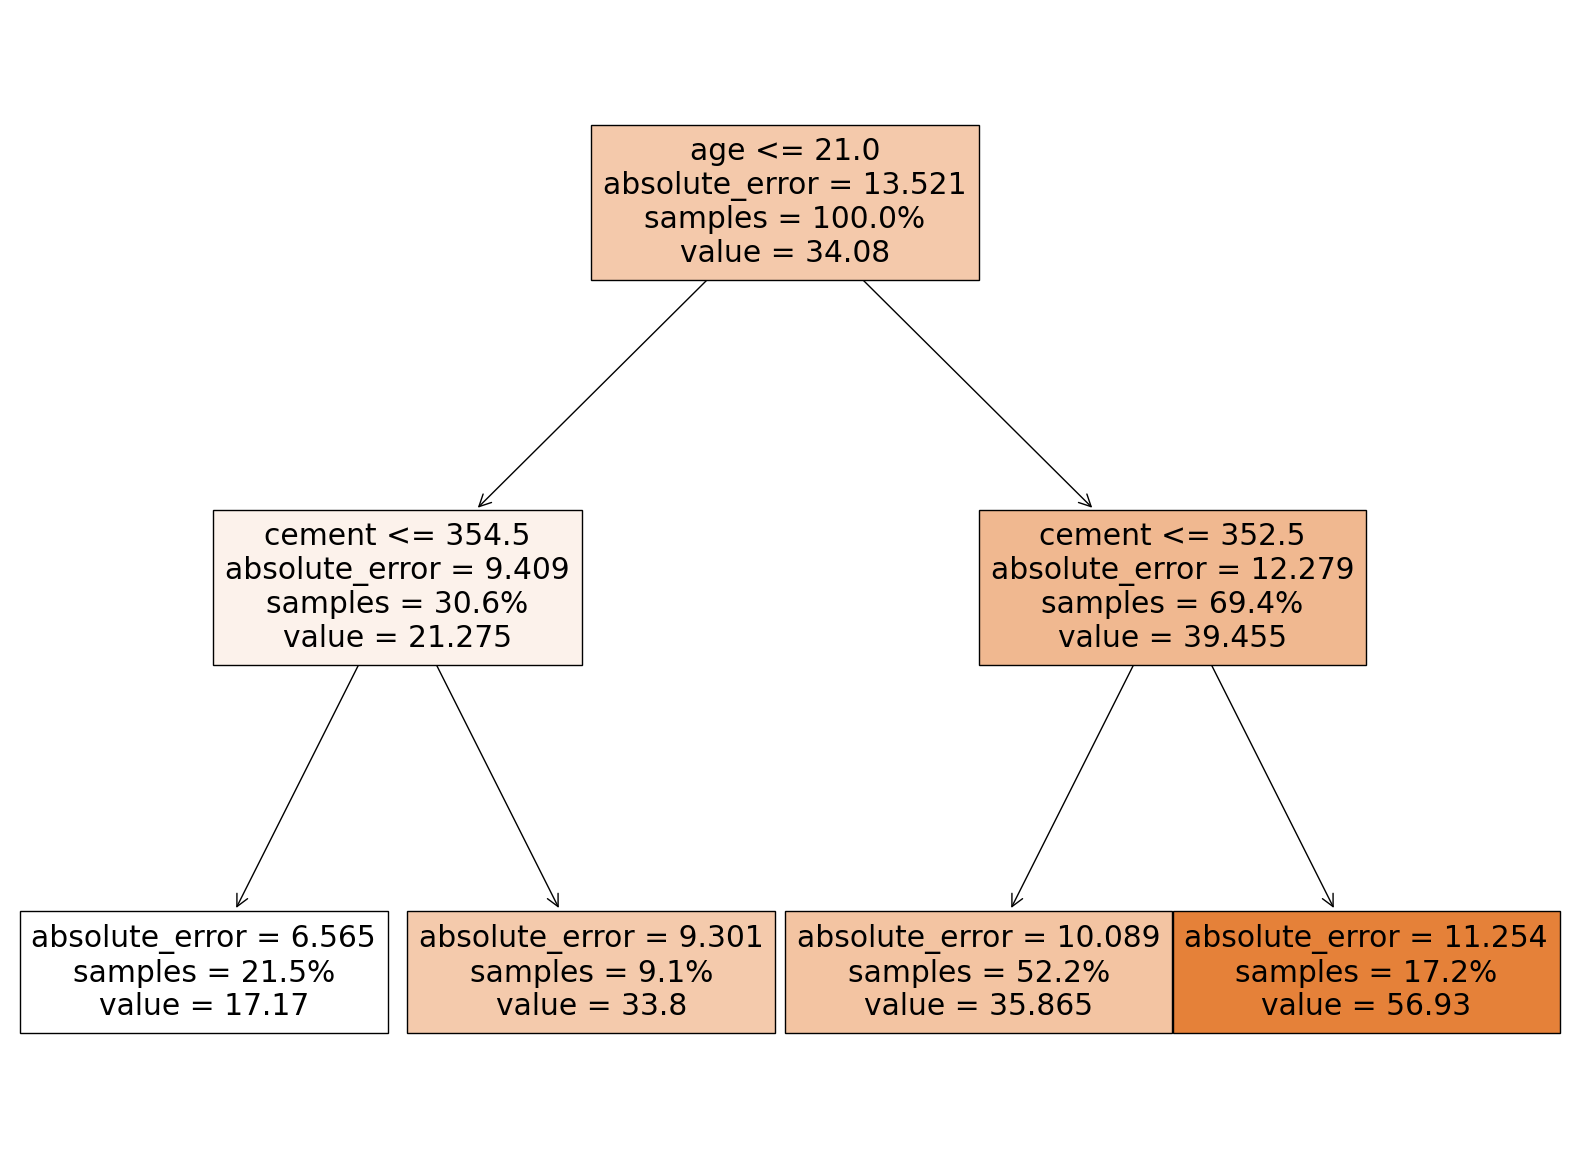

In [254]:
plt.figure(figsize=(20, 15))
plot_tree(best_model_c, feature_names=X_c.columns.tolist(), filled=True,
         proportion = True)
plt.show()

In [ ]:
# RECUÉRDESE LA IMPORTANCIA DE LOS PASOS A SEGUIR PARA IMPLEMENTAR DE FORMA ADECUADA UN MODELO:
# (1) CARGAR BASE DE DATOS Y CONOCER FRECUENCIA DE CLASES O DISTRIBUCIÓN DE ACUERDO CON EL TIPO DE PROBLEMA.
# (2) DIVIR TRAIN, TEST Y COMPROBAR SI LA DISTRIBUCIÓN DE LA VARIABLE DEPENDIENTE ES SIMILAR EN AMBOS SETS.
# (3) AJUSTAR EL MODELO Y VALORAR LAS NECESIDADES DE INVESTIGACIÓN PARA DAR MÁS PESO A UNAS MEDIDAS DE BONDAD DE AJUSTE CON RESPECTO A OTRAS.
# (4) HACER PREDICCIONES SOBRE TRAIN Y TEST CON EL FIN DE OBSERVAR EL POSIBLE SOBREAJUSTE. VALORAR EN TEST LA CAPACIDAD PREDICTIVA DEL MODELO.
# (5) HACER VALIDACIÓN CRUZADA (Y, EN CASO DE NECESIDAD, SEARCHGRID CON VARIOS PARÁMETROS.)
# (6) SELECCIONAR LAS ALTERNATIVAS QUE MÁS NOS INTERESEN POR SU BONDAD DE AJUSTE ESPECÍFICA.
# (7) MOSTRAR BOXPLOTS DE SU PERFORMANCE EN LAS DISTINTAS VALIDACIONES PARA VALORAR LA ROBUSTEZ Y TOMAR UNA DECISIÓN.
# (8) HACER UN INFORME DE LA PARAMETRIZACIÓN Y BONDAD DE AJUSTE DEL MODELO FINAL SELECCIONADO.